In [34]:
from math import *
import numpy as np
from itertools import product,permutations
from scipy.integrate import quad
# from scipy import integrate
import matplotlib.pyplot as plt
R1 = 1/sqrt(2)
T1 = 1j/sqrt(2)
R2 = 1
T2 = 0 
R3 = 1
T3 = 0
d = 1

In [109]:
s = np.matrix([[R1,T1,0,0],[R3*T1,R3*R1,T3*R2,T3*T2],[T3*T1,T3*R1,R3*R2,R3*T2],[0,0,T2,R2]])
u = np.transpose(s)

In [110]:
# s = np.matrix([[R,T,0],[R*T,R**2,T],[T**2,R*T,R]])
# u = np.transpose(s)

In [111]:
def transform_multi(u):
    comb = list(product(range(len(u)), repeat=len(u)))  
    temp = []
    temp2 = []
    for i in range(len(comb)):
        temp3 = 1
        for j in range(len(comb[i])):
            temp3 = temp3*u[j,comb[i][j]]
        if temp3 !=0:
            temp.append(list(comb[i]))
            temp2.append(temp3)
    return(temp,temp2)
def id_state(temp1,pstate):
    temp2 = []
    ptemp = []
    l = len(temp1)
    while l >0:
        temp3 = temp1[0]
        temp4 = []
        temp5 =[]
        for j in range(len(temp1)):
            if sorted(temp1[j]) == sorted(temp3):
                temp4.append(temp1[j])
                temp5.append(j)
        temp2.append(temp4)
        temp1 = [x for x in temp1 if (x not in temp4)]
        ptemp.append([pstate[x] for x in temp5])
        pstate = [pstate[x] for x in range(len(pstate)) if (x not in temp5)]
        l = len(temp1)
    return(temp2,ptemp)
def time_list(s):
    tim = [list(range(len(s[0])))]*len(s)
    timn = []
    for i in range(len(s)):
        temp = s[i]
        temp1 = s[0]
        temp2 = tim[0]
        temp3 = []
        for j in range(len(temp)): 
            ind = temp1.index(temp[j])
            temp3.append(temp2[ind])
            temp1 = [temp1[x] for x in range(len(temp1)) if (x is not ind)]
            temp2 = [temp2[x] for x in range(len(temp2)) if (x is not ind)]
        timn.append(temp3)
    return(timn)
def replication(se):
    if len(se) - len(set(se)) !=0:
        temp = list(permutations(list(range(len(se)))))
        temp1 = []
        for i in range(len(temp)):
            temp2 = []
            for j in range(len(temp[i])):
                temp2.append(se[temp[i][j]])
            if temp2 == se:
                temp1.append(temp[i])
    else:
        temp1 = [se]
    return(temp1)
def parameters(rep,t,p):
    temp = []
    ptemp = []
    for i in range(len(rep)):
        temp2 = rep[i]
        for j in range(len(t)):
            temp3 = t[j]
            temp4 = [0]*len(temp3)
            for k in range(len(temp2)):
                if k == temp2[k]:
                    temp4[temp3.index(k)] = k
                else:
                    temp4[temp3.index(k)] = temp2[k]
            temp.append(temp4)
            ptemp.append(p[j]/len(rep))
    return(temp,ptemp)
def state_parameters(state,sp,specific_state):
    s1,p1 = id_state(state,sp)
    ind = 0
    for i in range(len(s1)):
        if sorted(specific_state) == sorted(s1[i][0]):
            ind = i
    s = s1[ind]
    p = p1[ind]
    t = time_list(s)
    ind_state = s[0]
    rep = replication(ind_state)
    par1,par2 = parameters(rep,t,p)
    return(par1,par2)

# Beta

In [112]:
state,sp = transform_multi(u)

In [113]:
state

[[0, 0, 2, 3], [0, 1, 2, 3], [1, 0, 2, 3], [1, 1, 2, 3]]

In [114]:
sp

[0.4999999999999999j,
 (0.4999999999999999+0j),
 (-0.4999999999999999+0j),
 0.4999999999999999j]

In [135]:
id_state(state,sp)

([[[0, 0, 2, 3]], [[0, 1, 2, 3], [1, 0, 2, 3]], [[1, 1, 2, 3]]],
 [[0.4999999999999999j],
  [(0.4999999999999999+0j), (-0.4999999999999999+0j)],
  [0.4999999999999999j]])

In [75]:
def epsl(t,a):
    result = (2*d**2/pi)**(1/4)*exp(-d**2*(a-t)**2)
    return(result)               
def beta(x,y,z,t1,t2,t3):
    result = epsl(x,t1)*epsl(y,t2)*epsl(z,t3)
    return(result)
def gama(x,y,z):
    add = 0
    for i in range(len(V)):
        add += V[i]*beta(x,y,z,Stamp[3*i+0],Stamp[3*i+1],Stamp[3*i+2])
    result = (np.conj(add)*(add)).real
    return(result)
def time_stamp(time_state,time_mode):
    temp = []
    for i in range(len(time_state)):
        for j in range(len(time_state[i])):
#             print(i,j,time_state[i],time_state[i].index(j),time_mode)
            temp.append(time_mode[time_state[i].index(j)])
    return(temp)

In [137]:
time_mode = [0,4,8,8]
time_state,V = state_parameters(state,sp,[0,0,2,3])
time_stamp(time_state,time_mode)

[0, 4, 8, 8, 4, 0, 8, 8]

In [121]:
limit = [-8,12]
time_mode = [0,0,8,8]
# Stamp = time_stamp(time_state,time_mode)

In [122]:
def beta1(X,T):
    result = 1
    for i in range(len(X)):
        result = result*epsl(X[i],T[i])
    return(result)

In [140]:
def integrate(n,T1,T2):
    step = 10000
    temp = limit[0]
    temp2 = 0
    x = limit[1]-limit[0]
    dtt = x/step
    X1 = T1[:]
    X2 = T2[:]
    for i in range(step):
        X1[n] = temp
        X2[n] = temp
        temp2 += beta1(X1,T1)*beta1(X2,T2)*(2*d**2/pi)**(-(len(T1)-1)/2)*dtt
        temp += dtt
    return(temp2)

In [176]:
def gama2(temp_stamp,temp_V):
    temp = 0
    temp2 = int(len(temp_stamp)/len(temp_V))
    for i in range(len(temp_V)):
        for j in range(len(temp_V)):
            T1 = []
            T2 = []
            for k in range(temp2):
                T1.append(temp_stamp[temp2*i+k])
                T2.append(temp_stamp[temp2*j+k])
            multi = np.conj(temp_V[i])*temp_V[j]
            for k in range(temp2):
                multi = multi*integrate(k,T1,T2) 
            temp+=multi
    
    return(temp)

In [177]:
def repetition_multiplier(state_with_copy):
    temp1 = list(set(state_with_copy))
    temp2 = 1
    for i in range(len(temp1)):
        temp2 = temp2*factorial(state_with_copy.count(temp1[i]))
    return(temp2)


In [178]:
def Probability(state,sp,unique_state,temp_time_mode):
    temp_time_state,temp_V = state_parameters(state,sp,unique_state)
    temp_stamp = time_stamp(temp_time_state,temp_time_mode)
    result = gama2(temp_stamp,temp_V)*repetition_multiplier(unique_state)
    return(result)

In [181]:
Probability(state,sp,[0,1,2,3], [0,0,8,8])

0j

In [184]:
temp = 0 
unique,dddd = id_state(state,sp)
for i in range(len(unique)):
    temp1 = Probability(state,sp,unique[i][0],time_mode)
    temp+=temp1
    print(unique[i][0],temp1)
temp

[0, 0, 2, 3] (0.25000002813376365+0j)
[0, 1, 2, 3] (0.49999994373235257+0j)
[1, 1, 2, 3] (0.25000002813376365+0j)


(0.9999999999998799+0j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


c:\users\kevin\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


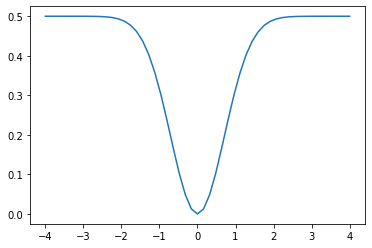

In [183]:
Tim = np.linspace(-4,4,51)
p01 = [0]*51
for i in range(51):
    t = Tim[i]
    print(i)
    time_mode = [0,t,8,8]
    prob = Probability(state,sp,[0,1,2,3],time_mode)
    p01[i] = prob
plt.plot(Tim, p01)

In [60]:
unique, ppp = id_state(state,sp)

In [66]:
unique[8]

[[2, 2, 2]]

In [68]:
temp

(0.6041666408773512+0j)

# Scipy

In [101]:
p123 = [0]*51
time_state,V = state_parameters(state,sp,[0,1,2])
for i in range(51):
    print(i)
    t = Tim[i]
    time_mode = [0,t,8]
    Stamp = time_stamp(time_state,time_mode)
    prob = integrate.tplquad(gama, -8, 12, lambda x: -8, lambda x: 12,lambda x, y: -8, lambda x, y: 12)[0]
    p123[i] = prob

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [102]:
p133 = [0]*51
time_state,V = state_parameters(state,sp,[0,2,2])
for i in range(51):
    print(i)
    t = Tim[i]
    time_mode = [0,t,8]
    Stamp = time_stamp(time_state,time_mode)
    prob = integrate.tplquad(gama, -8, 12, lambda x: -8, lambda x: 12,lambda x, y: -8, lambda x, y: 12)[0]
    p133[i] = prob

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [103]:
p122 = [0]*51
time_state,V = state_parameters(state,sp,[0,1,1])
for i in range(51):
    print(i)
    t = Tim[i]
    time_mode = [0,t,8]
    Stamp = time_stamp(time_state,time_mode)
    prob = integrate.tplquad(gama, -8, 12, lambda x: -8, lambda x: 12,lambda x, y: -8, lambda x, y: 12)[0]
    p122[i] = prob

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [104]:
Hom = np.array(p133)+np.array(p123)+np.array(p122)

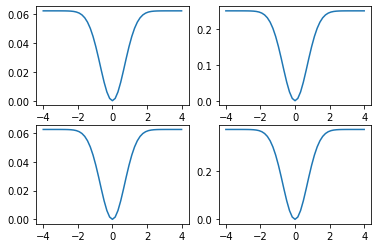

In [105]:
plt.subplot(221)
plt.plot(Tim, p122)
plt.subplot(222)
plt.plot(Tim, p123)
plt.subplot(223)
plt.plot(Tim, p133)
plt.subplot(224)
plt.plot(Tim, Hom)
plt.show()